# What are the most demanded skills for the top 3 most popular data roles?

### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findingsCalculate skill count based on job_title_short


In [42]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\User\Downloads\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

def to_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    
df['job_skills'] = df['job_skills'].apply(to_list)

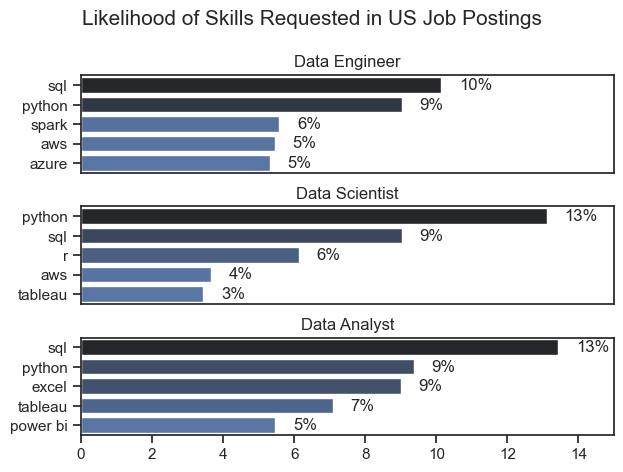

In [43]:
df_india = df[df['job_country']== 'India'].copy()
df_skills = df_india.explode('job_skills')
df_skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = df_skill_count.reset_index(name= 'skill_count')
df_skill_count.sort_values(by= 'skill_count', ascending= False, inplace= True)
df_skills_job = df_skills.groupby('job_title_short').size().reset_index(name= 'total_count')
df_skill_percent = df_skill_count.merge(right= df_skills_job, on= 'job_title_short', how= 'left')
df_skill_percent['skill_percentage'] = (df_skill_percent['skill_count']/df_skill_percent['total_count'])*100

# top 3 roles in india
job_titles = df_skill_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3]

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_percent[df_skill_percent['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 15)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v + .5, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()



# df_skill_percent.sort_values(by= 'skill_percentage', ascending= False)
# df_skills_new = df_skills.groupby('job_title_short')['job_skills'].agg('size')
# df_skills_new